In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
file_path = r"C:\Users\ACER\Documents\cognizant\cleaned_churn.csv"
df = pd.read_csv(file_path)

The dataset contains all the rows where the churn is both false and true.

In [3]:
# Ensure 'Churn' column is properly formatted
df['Churn'] = df['Churn'].astype(int)

The Churn column is converted to integer type which is used for calculations and analysis.

In [4]:
# Select relevant numerical columns for clustering
numerical_cols = [
    'Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 
    'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls'
]
X = df[numerical_cols]

These features are chosen to identify customer behavior and potential churn.

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- The features are standardized because it ensures that all features contribute equally to the clustering process.
- All features of the data scaled to have a mean of 0 and a standard deviation of 1. 


In [6]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

The Elbow Method is used to determine the optimal number of clusters. The Within-Cluster Sum of Squares (WCSS) is calculated for 1 to 10 clusters, and the results are plotted.

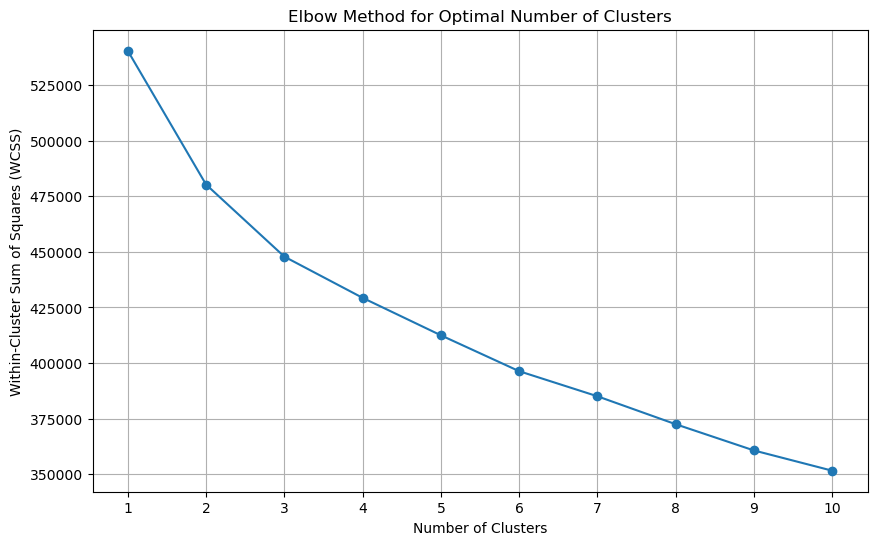

In [7]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [8]:
# Choosing the optimal number of clusters, e.g., 3 for illustration purposes
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

The optimal number of clusters is chosen where the WCSS begins to decrease at a slower rate. 3 in this case , each customer in the dataset is assigned to one of these clusters.

In [9]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

Principal Component Analysis (PCA) is done to reduce the data to 2 dimensions for visualization purposes, which capture the most significant variance in the data.

In [10]:
 # Calculate Customer Lifetime Value (CLV)
 df['CLV'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] + df['Intl_Charge']

- CLV is calculated as the sum of different charges  for each customer. 
- It helps us to find the total value a customer can bring to the business.

In [11]:
# Define cluster names based on your analysis
cluster_names = {
    0: 'Potential Low Value Customers',
    1: 'Potential Medium Value Customers',
    2: 'Potential High Value Customers'
}

These names are based on the expected value of each cluster.

In [12]:
# Map clusters to descriptive names
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

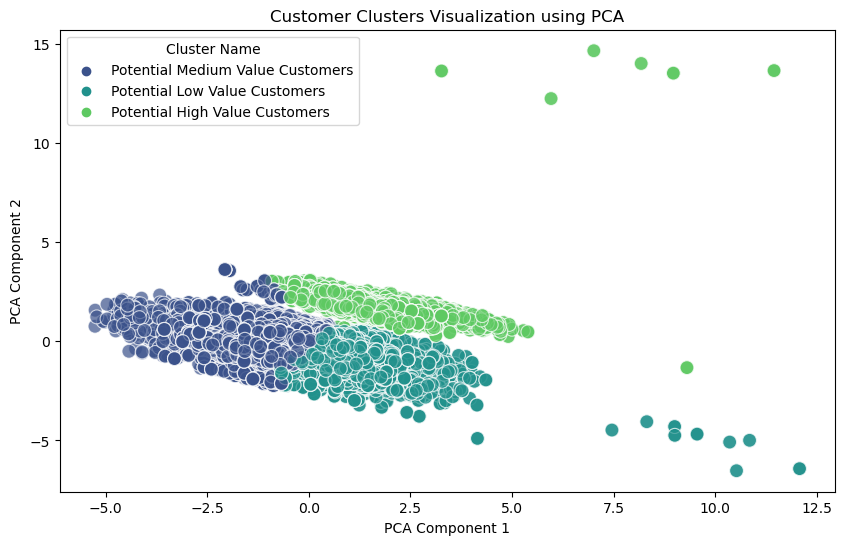

In [13]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Name', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clusters Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Name', loc='best')
plt.show()

A plot is created to visualize the clusters in 2D. The clusters provide a visual distinction between different customer groups(low,medium,high).

In [14]:
# Cluster analysis: describe statistics and CLV
cluster_analysis = {}
for i in range(optimal_clusters):
    cluster_name = cluster_names.get(i, f'Cluster {i}')
    cluster_data = df[df['Cluster'] == i][numerical_cols].describe()
    cluster_clv_mean = df[df['Cluster'] == i]['CLV'].mean()
    churn_rate = df[df['Cluster'] == i]['Churn'].mean() * 100  # Convert to percentage
    cluster_analysis[cluster_name] = {
        'Data Description': cluster_data,
        'Average CLV': cluster_clv_mean,
        'Churn Rate': churn_rate
    }

This statistics help in understanding the characteristics of each customer group.

In [15]:
# Save the updated dataframe with clusters and CLV to a CSV file
output_path = r"C:\Users\ACER\Documents\cognizant\churn_whole_clus.csv"
df.to_csv(output_path, index=False)

In [16]:
# Results
print("Cluster Analysis Summary:")
for cluster_name, analysis in cluster_analysis.items():
    print(f"\n{cluster_name}:\n")
    print(analysis['Data Description'])
    print(f"Average CLV: {analysis['Average CLV']:.2f}")
    print(f"Churn Rate: {analysis['Churn Rate']:.2f}%")

Cluster Analysis Summary:

Potential Low Value Customers:

       Account_Length  VMail_Message     Day_Mins    Day_Calls   Day_Charge  \
count     9678.000000    9678.000000  9678.000000  9678.000000  9678.000000   
mean       173.651788      15.147448   269.646383   173.860818    53.868378   
std        103.076110      27.783695    47.511592    93.067494    29.607532   
min          2.000000       0.000000    62.600000    20.000000     6.320000   
25%         82.000000       0.000000   228.200000    89.000000    28.600000   
50%        206.000000       0.000000   282.200000   202.000000    32.920000   
75%        268.000000      24.000000   292.900000   226.000000    82.820000   
max        329.000000     211.000000   444.400000   329.000000   211.990000   

          Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  Night_Calls  \
count  9678.000000  9678.000000  9678.000000  9678.000000  9678.000000   
mean    278.276201   173.841703    27.434462   276.655310   169.433767   
std    

### Output Inference:

**Potential Low Value Customers:**

- These customers have been with the company for a long time (average ~174 days).
- They use a relatively high amount of daytime minutes and many do not use voicemail.
- Their CLV is around 96.95.
- 11.49% of these customers are likely to leave.
- These customers might be long-term but they are less profitable.

**Potential Medium Value Customers:**

- These customers have a shorter relationship with the company.
- These customers show a low usage in daytime minutes and they have a low number of voicemail messages.
- Their CLV is around 65.75.
- The churn rate is 11.08%.
- These customers are moderately engaged who generate less revenue.

**Potential High Value Customers:**

- These customers have a long relationship with the company.
- They use a high amount of daytime minutes and only few use use voicemail messages in this group.
- Their CLV is 96.59 indicates the profit.
- As the churn rate is 13.00%,risking of losing customer is high comparing to other groups.
- These customers are profitable, but the risk of churning is slightly higher when compared to other 2 groups.

In [17]:
# Count the number of records in each cluster
cluster_counts = df['Cluster_Name'].value_counts()

In [18]:
print("\nNumber of Records in Each Cluster:")
print(cluster_counts)


Number of Records in Each Cluster:
Potential Medium Value Customers    20085
Potential Low Value Customers        9678
Potential High Value Customers       6270
Name: Cluster_Name, dtype: int64


It provides the information on number of customers present in each group.